In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import understatapi
import numpy as np

client = understatapi.UnderstatClient()

In [2]:
league_data = client.league(league='La_Liga').get_match_data(season='2024')

In [3]:
shot_data = client.match(match = '27117').get_shot_data()

In [4]:
shot_data

{'h': [{'id': '603207',
   'minute': '3',
   'result': 'MissedShots',
   'X': '0.9019999694824219',
   'Y': '0.53',
   'xG': '0.45454949140548706',
   'player': 'Iago Aspas',
   'h_a': 'h',
   'player_id': '2290',
   'situation': 'OpenPlay',
   'season': '2024',
   'shotType': 'LeftFoot',
   'match_id': '27117',
   'h_team': 'Celta Vigo',
   'a_team': 'Barcelona',
   'h_goals': '2',
   'a_goals': '2',
   'date': '2024-11-23 20:00:00',
   'player_assisted': 'Óscar Mingueza',
   'lastAction': 'Pass'},
  {'id': '603210',
   'minute': '18',
   'result': 'BlockedShot',
   'X': '0.89',
   'Y': '0.40900001525878904',
   'xG': '0.0929676964879036',
   'player': 'Hugo Álvarez',
   'h_a': 'h',
   'player_id': '10078',
   'situation': 'OpenPlay',
   'season': '2024',
   'shotType': 'RightFoot',
   'match_id': '27117',
   'h_team': 'Celta Vigo',
   'a_team': 'Barcelona',
   'h_goals': '2',
   'a_goals': '2',
   'date': '2024-11-23 20:00:00',
   'player_assisted': 'Ilaix Moriba',
   'lastAction': '

In [5]:
data = pd.read_csv("Mallorca vs Barcelona.csv")

In [6]:
data

,Number,Team,Minute,Result,xG,X,Y,x,y,Player,Assister
0,0,Mallorca,23,Missed,0.036,92.40,62.7,NaN,NaN,Antonio Sanchez,Johan Mojica
1,1,Mallorca,33,Blocked,0.058,84.50,56.4,NaN,NaN,Samu Costa,NaN
2,2,Mallorca,33,Blocked,0.027,83.60,71.7,NaN,NaN,Sergi Darder,NaN
3,3,Mallorca,42,Goal,0.740,94.50,55.3,NaN,NaN,Vedat Muriqi,Pablo Maffeo
4,4,Mallorca,70,Blocked,0.040,92.09,44.0,NaN,NaN,Samu Costa,NaN
5,5,Mallorca,71,Missed,0.018,77.09,27.2,NaN,NaN,Dani Rodriguez,Samu Costa
6,6,Barcelona,11,Goal,0.380,NaN,NaN,87.00,50.09,Ferran Torres,NaN
7,7,Barcelona,18,Saved,0.310,NaN,NaN,89.00,55.50,Ferran Torres,Alex Balde
8,8,Barcelona,20,Missed,0.370,NaN,NaN,85.40,47.90,Lamine Yamal,Raphinha
9,9,Barcelona,36,Missed,0.110,NaN,NaN,98.30,37.50,Ferran Torres,Raphinha


In [7]:
a_xG = [0]
h_xG = [0]
a_min = [0]
h_min = [0]

#find home and away teams

hteam = data['Team'].iloc[0]
ateam = data['Team'].iloc[-1]

for x in range(len(data['xG'])):
    if data['Team'][x] == ateam:
        a_xG.append(data['xG'][x])
        a_min.append(data['Minute'][x])
    if data['Team'][x] == hteam:
        h_xG.append(data['xG'][x])
        h_min.append(data['Minute'][x])

In [8]:
a_xG

[0,
 0.38,
 0.31,
 0.37,
 0.11,
 0.03,
 0.55,
 0.04,
 0.11,
 0.08,
 0.14,
 0.75,
 0.018,
 0.09,
 0.46,
 0.11,
 0.02,
 0.52,
 0.01,
 0.94,
 0.33]

In [9]:
h_xG

[0, 0.036, 0.058, 0.027, 0.74, 0.04, 0.018]

In [10]:
a_min

[0,
 11,
 18,
 20,
 36,
 40,
 46,
 46,
 47,
 48,
 52,
 55,
 59,
 59,
 73,
 76,
 77,
 78,
 81,
 83,
 86]

In [11]:
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]

a_cumulative = nums_cumulative_sum(a_xG)
h_cumulative = nums_cumulative_sum(h_xG)

In [12]:
a_cumulative

[0,
 0.38,
 0.69,
 1.06,
 1.1700000000000002,
 1.2000000000000002,
 1.7500000000000002,
 1.7900000000000003,
 1.9000000000000004,
 1.9800000000000004,
 2.1200000000000006,
 2.8700000000000006,
 2.8880000000000003,
 2.978,
 3.438,
 3.548,
 3.568,
 4.088,
 4.098,
 5.038,
 5.368]

In [13]:
h_cumulative

[0, 0.036, 0.094, 0.121, 0.861, 0.901, 0.919]

In [14]:
a_total = round(a_cumulative[-1],2)
h_total = round(h_cumulative[-1],2)

In [15]:
a_total

5.37

In [16]:
h_total

0.92

Text(0.8, 0, '@Barca_Buzz')

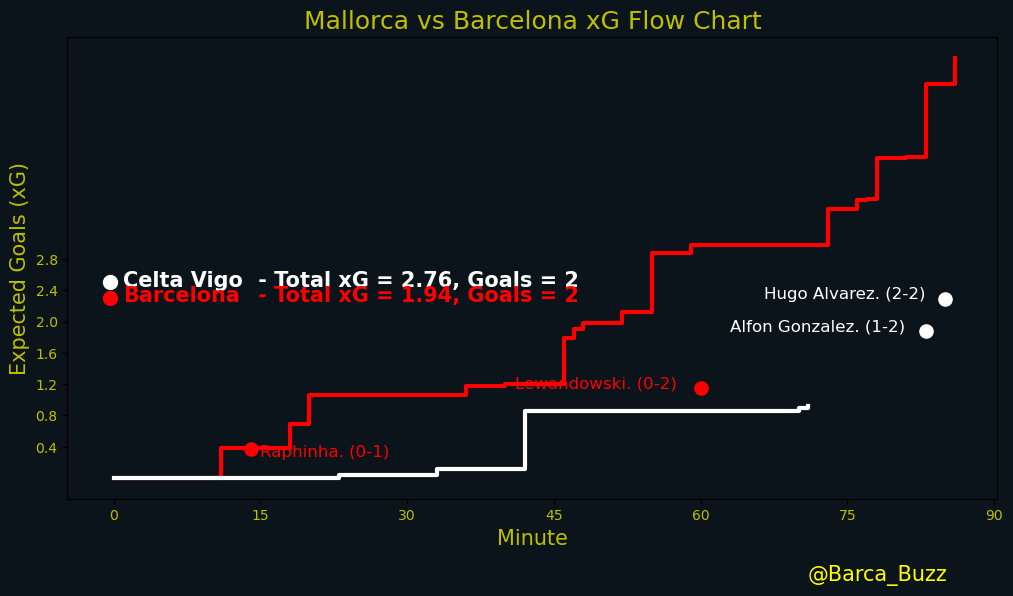

In [19]:
fig, ax = plt.subplots(figsize = (12,6))
fig.set_facecolor('#0a141a')
ax.patch.set_facecolor('#0a141a')

plt.xticks([0,15,30,45,60,75,90], c = 'y')
plt.yticks([0.4, 0.8, 1.2, 1.6, 2.0, 2.4, 2.8], c='y')
plt.xlabel('Minute', fontsize = 15, c = 'y')
plt.ylabel('Expected Goals (xG)', fontsize = 15, c = 'y')
plt.title("Mallorca vs Barcelona xG Flow Chart", fontsize = 18, c ='y')

ax.step(x = a_min,y = a_cumulative, where = 'post', linewidth = 3, c = 'r')
ax.step(x = h_min,y = h_cumulative, where = 'post', linewidth = 3, c = 'w')

plt.scatter(x = -0.4, y = 2.5, s = 100, c = 'w',)
plt.text(x = 1, y = 2.45, s = f'Celta Vigo', c = 'w', fontsize = 15, fontweight = 'bold')
plt.text(x = 14, y = 2.45, s = f' - Total xG = 2.76, Goals = 2', c = 'w', fontsize = 15, fontweight = 'bold')

plt.scatter(x = -0.4, y = 2.3, s = 100, c = 'r',)
plt.text(x = 1, y = 2.25, s = f'Barcelona', c = 'r', fontsize = 15, fontweight = 'bold')
plt.text(x = 14, y = 2.25, s = f' - Total xG = 1.94, Goals = 2', c = 'r', fontsize = 15, fontweight = 'bold')

plt.scatter(x = 14, y = 0.37, s = 90, c = 'r',)
plt.text(x = 15, y = 0.27, s = f'Raphinha. (0-1)', c = 'r', fontsize =12)

plt.scatter(x = 60, y = 1.15, s = 90, c = 'r',)
plt.text(x = 41, y = 1.15, s = f'Lewandowski. (0-2)', c = 'r', fontsize = 12)

plt.scatter(x = 83, y = 1.877, s = 90, c = 'w',)
plt.text(x = 63, y = 1.877, s = f'Alfon Gonzalez. (1-2)', c = 'w', fontsize = 12)

plt.scatter(x = 85, y = 2.287, s = 90, c = 'w',)
plt.text(x = 66.5, y = 2.287, s = f'Hugo Alvarez. (2-2)', c = 'w', fontsize = 12)

endnote = "@Barca_Buzz"
plt.figtext(0.8, 0, endnote, ha="center", va="top", fontsize=15, color="yellow")

Text(30.8, 0.84, 'Muriqi. (1-1)')

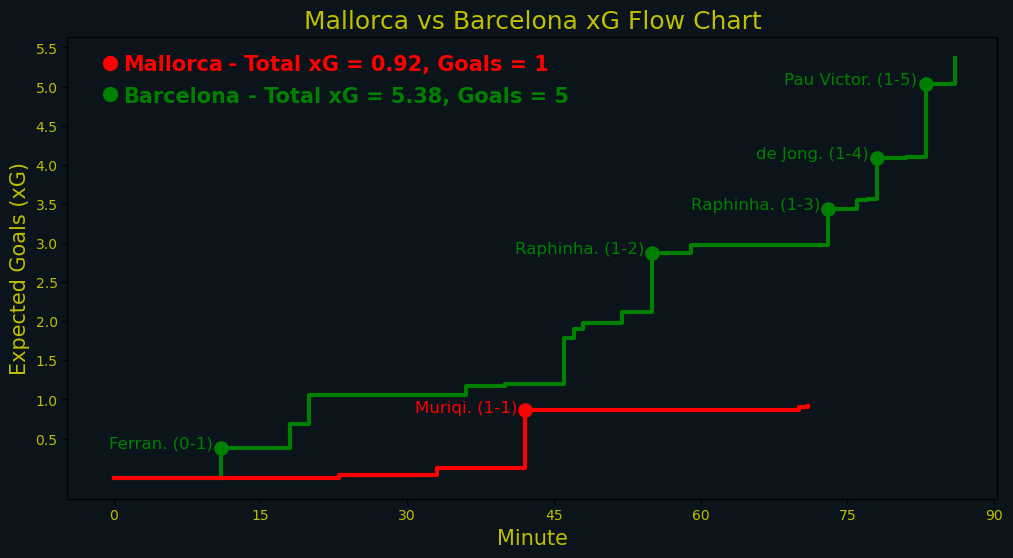

In [60]:
fig, ax = plt.subplots(figsize = (12,6))
fig.set_facecolor('#0a141a')
ax.patch.set_facecolor('#0a141a')

plt.xticks([0,15,30,45,60,75,90], c = 'y')
plt.yticks([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5], c='y')
plt.xlabel('Minute', fontsize = 15, c = 'y')
plt.ylabel('Expected Goals (xG)', fontsize = 15, c = 'y')
plt.title("Mallorca vs Barcelona xG Flow Chart", fontsize = 18, c ='y')

ax.step(x = a_min,y = a_cumulative, where = 'post', linewidth = 3, c = 'g')
ax.step(x = h_min,y = h_cumulative, where = 'post', linewidth = 3, c = 'r')

plt.scatter(x = -0.4, y = 5.3, s = 100, c = 'r',)
plt.text(x = 1, y = 5.2, s = f'Mallorca', c = 'r', fontsize = 15, fontweight = 'bold')
plt.text(x = 11, y = 5.2, s = f' - Total xG = 0.92, Goals = 1', c = 'r', fontsize = 15, fontweight = 'bold')

plt.scatter(x = -0.4, y = 4.9, s = 100, c = 'g',)
plt.text(x = 1, y = 4.8, s = f'Barcelona', c = 'g', fontsize = 15, fontweight = 'bold')
plt.text(x = 13, y = 4.8, s = f' - Total xG = 5.38, Goals = 5', c = 'g', fontsize = 15, fontweight = 'bold')

plt.scatter(x = 11, y = 0.38, s = 90, c = 'g',)
plt.text(x = -0.5, y = 0.38, s = f'Ferran. (0-1)', c = 'g', fontsize =12)

plt.scatter(x = 55, y = 2.87, s = 90, c = 'g',)
plt.text(x = 41, y = 2.87, s = f'Raphinha. (1-2)', c = 'g', fontsize = 12)

plt.scatter(x = 73, y = 3.43, s = 90, c = 'g',)
plt.text(x = 59, y = 3.43, s = f'Raphinha. (1-3)', c = 'g', fontsize = 12)

plt.scatter(x = 78, y = 4.08, s = 90, c = 'g',)
plt.text(x = 65.7, y = 4.08, s = f'de Jong. (1-4)', c = 'g', fontsize = 12)

plt.scatter(x = 83, y = 5.03, s = 90, c = 'g',)
plt.text(x = 68.5, y = 5.03, s = f'Pau Victor. (1-5)', c = 'g', fontsize = 12)

plt.scatter(x = 42, y = 0.86, s = 90, c = 'r',)
plt.text(x = 30.8, y = 0.84, s = f'Muriqi. (1-1)', c = 'r', fontsize = 12)

#plt.scatter(x = 85, y = 2.287, s = 90, c = 'w',)
#plt.text(x = 66.5, y = 2.287, s = f'Hugo Alvarez. (2-2)', c = 'w', fontsize = 12)


#endnote = "@Barca_Buzz"
#plt.figtext(0.8, 0, endnote, ha="center", va="top", fontsize=15, color="yellow")

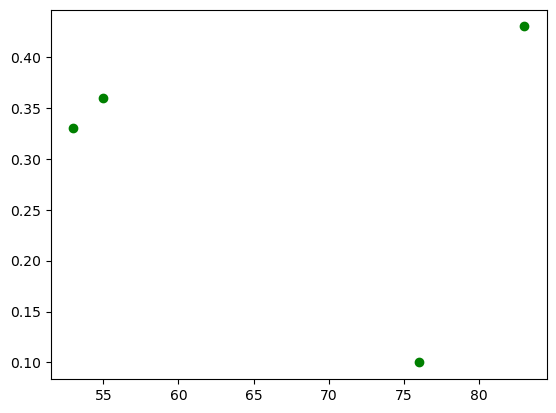